Pmax: 4.050000000000001 W at Voltage: 3.0 V, Current: 1.35 A
Imp: 1.61 A at Voltage: 0.0 V
Vmp: 0.0 V at Current: 1.61 A


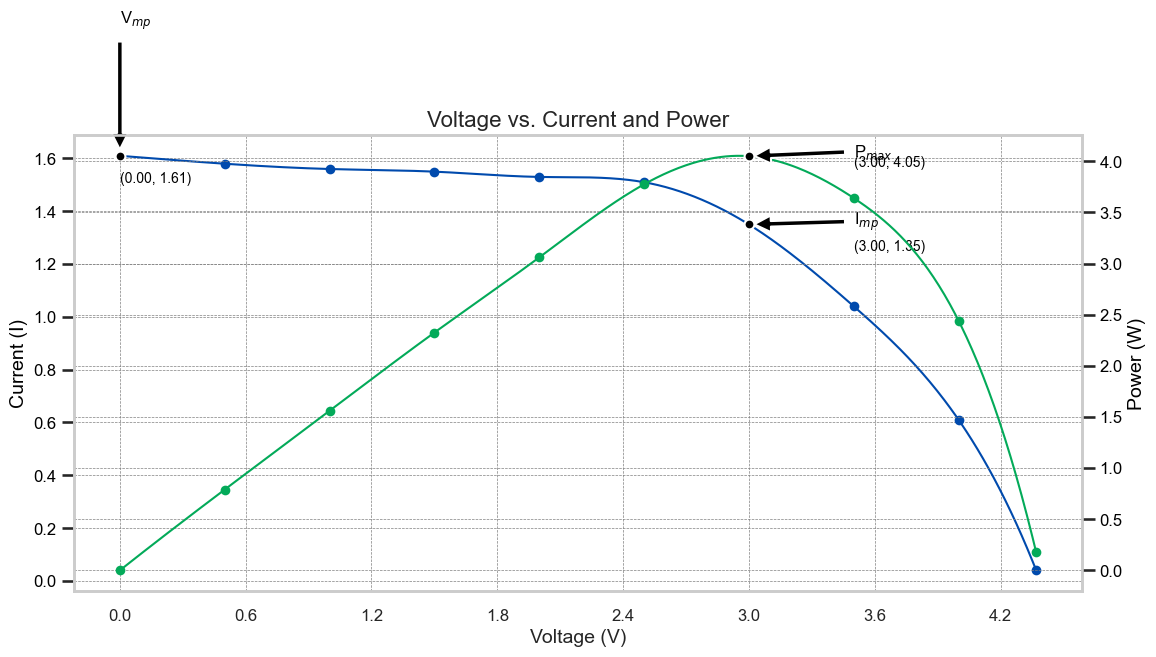

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Data for the graph
voltage = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.37])
current = np.array([1.61, 1.58, 1.56, 1.55, 1.53, 1.51, 1.35, 1.04, 0.61, 0.04])
power = voltage * current

# Smooth data using spline interpolation
voltage_smooth = np.linspace(voltage.min(), voltage.max(), 500)
current_smooth = make_interp_spline(voltage, current)(voltage_smooth)
power_smooth = make_interp_spline(voltage, power)(voltage_smooth)

# Find the index of maximum power
max_power_idx = np.argmax(power)
max_power_voltage = voltage[max_power_idx]
max_power_current = current[max_power_idx]
max_power_value = power[max_power_idx]

# Find the index of maximum current
max_current_idx = np.argmax(current)
max_current_voltage = voltage[max_current_idx]
max_current_value = current[max_current_idx]

# Find the voltage corresponding to the maximum current (Vmp)
vmp_voltage = max_current_voltage
vmp_current = max_current_value

# Print values and coordinates
print(f"Pmax: {max_power_value} W at Voltage: {max_power_voltage} V, Current: {max_power_current} A")
print(f"Imp: {max_current_value} A at Voltage: {max_current_voltage} V")
print(f"Vmp: {vmp_voltage} V at Current: {vmp_current} A")

# Create a DataFrame
data = pd.DataFrame({'Voltage': voltage, 'Current': current, 'Power': power})

# Set the theme and context for larger scale
sns.set_theme(style="whitegrid")
sns.set_context("talk")  # Larger context for the plot

# Initialize the figure with a larger size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Voltage vs. Current with smooth curve
ax1.plot(voltage_smooth, current_smooth, color='#004aad', linewidth=1.5, label='Current')
ax1.scatter(voltage, current, color='#004aad', s=30)  # Adjusted marker size
ax1.set_xlabel('Voltage (V)', fontsize=14)
ax1.set_ylabel('Current (I)', fontsize=14, color='#000000')
ax1.tick_params(axis='y', labelcolor='#000000', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Set x-axis ticks
xticks = [i / 10.0 for i in range(0, 45, 6)]  # Generate ticks at 0.5 intervals
ax1.set_xticks(xticks)

# Create a secondary y-axis for power with smooth curve
ax2 = ax1.twinx()
ax2.plot(voltage_smooth, power_smooth, color='#03aa59', linewidth=1.5, label='Power')
ax2.scatter(voltage, power, color='#03aa59', s=30)  # Adjusted marker size
ax2.set_ylabel('Power (W)', fontsize=14, color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000', labelsize=12)

# Mark and annotate Pmax, Imp, Vmp
ax1.scatter(max_power_voltage, max_power_current, color='black', s=50, edgecolor='white', zorder=5)
ax1.annotate('I$_{mp}$', xy=(max_power_voltage, max_power_current), xytext=(max_power_voltage+0.5, max_power_current),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
ax1.text(max_power_voltage + 0.5, max_power_current - 0.1, f'({max_power_voltage:.2f}, {max_power_current:.2f})', fontsize=10, color='black')

ax2.scatter(max_power_voltage, max_power_value, color='black', s=50, edgecolor='white', zorder=5)
ax2.annotate('P$_{max}$', xy=(max_power_voltage, max_power_value), xytext=(max_power_voltage+0.5, max_power_value),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
ax2.text(max_power_voltage + 0.5, max_power_value - 0.1, f'({max_power_voltage:.2f}, {max_power_value:.2f})', fontsize=10, color='black')

ax1.scatter(vmp_voltage, vmp_current, color='black', s=50, edgecolor='white', zorder=5)
ax1.annotate('V$_{mp}$', xy=(vmp_voltage, vmp_current), xytext=(vmp_voltage, vmp_current+0.5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
ax1.text(vmp_voltage, vmp_current - 0.1, f'({vmp_voltage:.2f}, {vmp_current:.2f})', fontsize=10, color='black')

# Add title
plt.title('Voltage vs. Current and Power', fontsize=16)

# Customize grid lines to be lighter
ax1.grid(color='grey', linestyle='--', linewidth=0.5)  # Customize grid lines for ax1
ax2.grid(color='grey', linestyle='--', linewidth=0.5)  # Customize grid lines for ax2

# Manually adjust layout
plt.subplots_adjust(left=0.08, right=0.92, top=0.88, bottom=0.12)

# Show the plot
plt.show()


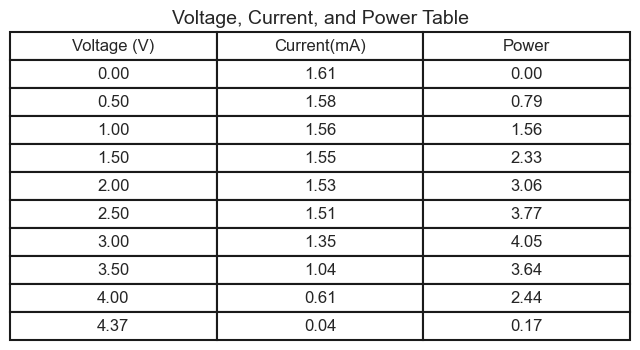

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
voltage = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.37]
current = [1.61, 1.58, 1.56, 1.55, 1.53, 1.51, 1.35, 1.04, 0.61, 0.04]
power = [v * c for v, c in zip(voltage, current)]

# Create a DataFrame with formatted values
data = pd.DataFrame({
    'Voltage (V)': [f'{v:.2f}' for v in voltage],
    'Current(mA)': [f'{c:.2f}' for c in current],
    'Power': [f'{p:.2f}' for p in power]
})

# Create a new figure for the table
fig_table, ax_table = plt.subplots(figsize=(8, 4))  # Adjust figure size to make it narrower

# Create the table
ax_table.axis('tight')
ax_table.axis('off')
table_data = data.values
columns = data.columns
table = ax_table.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.8, 1)  # Scale table width

# Add title to the table
plt.title('Voltage, Current, and Power Table', fontsize=14)

# Save or show the table figure
plt.savefig('table.png', bbox_inches='tight')
plt.show()


Pmax: 1.575 W at Voltage: 2.5 V, Current: 0.63 A
Imp: 0.8 A at Voltage: 0.0 V
Vmp: 0.0 V at Current: 0.8 A


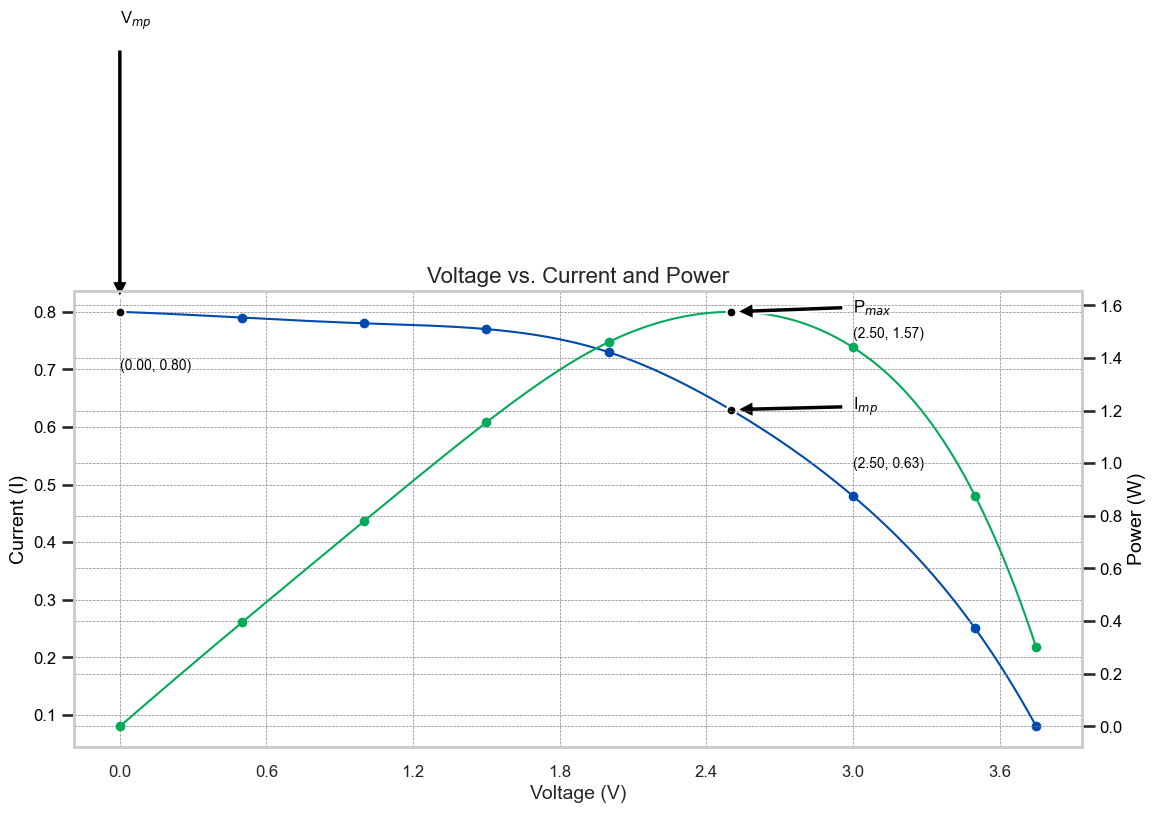

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Data for the graph
voltage = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 3.75])
current = np.array([0.8,  0.79, 0.78, 0.77, 0.73, 0.63, 0.48, 0.25, 0.08])
power = voltage * current

# Smooth data using spline interpolation
voltage_smooth = np.linspace(voltage.min(), voltage.max(), 500)
current_smooth = make_interp_spline(voltage, current)(voltage_smooth)
power_smooth = make_interp_spline(voltage, power)(voltage_smooth)

# Find the index of maximum power
max_power_idx = np.argmax(power)
max_power_voltage = voltage[max_power_idx]
max_power_current = current[max_power_idx]
max_power_value = power[max_power_idx]

# Find the index of maximum current
max_current_idx = np.argmax(current)
max_current_voltage = voltage[max_current_idx]
max_current_value = current[max_current_idx]

# Find the voltage corresponding to the maximum current (Vmp)
vmp_voltage = max_current_voltage
vmp_current = max_current_value

# Print values and coordinates
print(f"Pmax: {max_power_value} W at Voltage: {max_power_voltage} V, Current: {max_power_current} A")
print(f"Imp: {max_current_value} A at Voltage: {max_current_voltage} V")
print(f"Vmp: {vmp_voltage} V at Current: {vmp_current} A")

# Create a DataFrame
data = pd.DataFrame({'Voltage': voltage, 'Current': current, 'Power': power})

# Set the theme and context for larger scale
sns.set_theme(style="whitegrid")
sns.set_context("talk")  # Larger context for the plot

# Initialize the figure with a larger size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Voltage vs. Current with smooth curve
ax1.plot(voltage_smooth, current_smooth, color='#004aad', linewidth=1.5, label='Current')
ax1.scatter(voltage, current, color='#004aad', s=30)  # Adjusted marker size
ax1.set_xlabel('Voltage (V)', fontsize=14)
ax1.set_ylabel('Current (I)', fontsize=14, color='#000000')
ax1.tick_params(axis='y', labelcolor='#000000', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Set x-axis ticks
xticks = [i / 10.0 for i in range(0, 45, 6)]  # Generate ticks at 0.5 intervals
ax1.set_xticks(xticks)

# Create a secondary y-axis for power with smooth curve
ax2 = ax1.twinx()
ax2.plot(voltage_smooth, power_smooth, color='#03aa59', linewidth=1.5, label='Power')
ax2.scatter(voltage, power, color='#03aa59', s=30)  # Adjusted marker size
ax2.set_ylabel('Power (W)', fontsize=14, color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000', labelsize=12)

# Mark and annotate Pmax, Imp, Vmp
ax1.scatter(max_power_voltage, max_power_current, color='black', s=50, edgecolor='white', zorder=5)
ax1.annotate('I$_{mp}$', xy=(max_power_voltage, max_power_current), xytext=(max_power_voltage+0.5, max_power_current),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
ax1.text(max_power_voltage + 0.5, max_power_current - 0.1, f'({max_power_voltage:.2f}, {max_power_current:.2f})', fontsize=10, color='black')

ax2.scatter(max_power_voltage, max_power_value, color='black', s=50, edgecolor='white', zorder=5)
ax2.annotate('P$_{max}$', xy=(max_power_voltage, max_power_value), xytext=(max_power_voltage+0.5, max_power_value),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
ax2.text(max_power_voltage + 0.5, max_power_value - 0.1, f'({max_power_voltage:.2f}, {max_power_value:.2f})', fontsize=10, color='black')

ax1.scatter(vmp_voltage, vmp_current, color='black', s=50, edgecolor='white', zorder=5)
ax1.annotate('V$_{mp}$', xy=(vmp_voltage, vmp_current), xytext=(vmp_voltage, vmp_current+0.5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
ax1.text(vmp_voltage, vmp_current - 0.1, f'({vmp_voltage:.2f}, {vmp_current:.2f})', fontsize=10, color='black')

# Add title
plt.title('Voltage vs. Current and Power', fontsize=16)

# Customize grid lines to be lighter
ax1.grid(color='grey', linestyle='--', linewidth=0.5)  # Customize grid lines for ax1
ax2.grid(color='grey', linestyle='--', linewidth=0.5)  # Customize grid lines for ax2

# Manually adjust layout
plt.subplots_adjust(left=0.08, right=0.92, top=0.88, bottom=0.12)

# Show the plot
plt.show()


Pmax: 1.575 W at Voltage: 2.5 V, Current: 0.63 A
Imp: 0.8 A at Voltage: 0.0 V
Vmp: 0.0 V at Current: 0.8 A


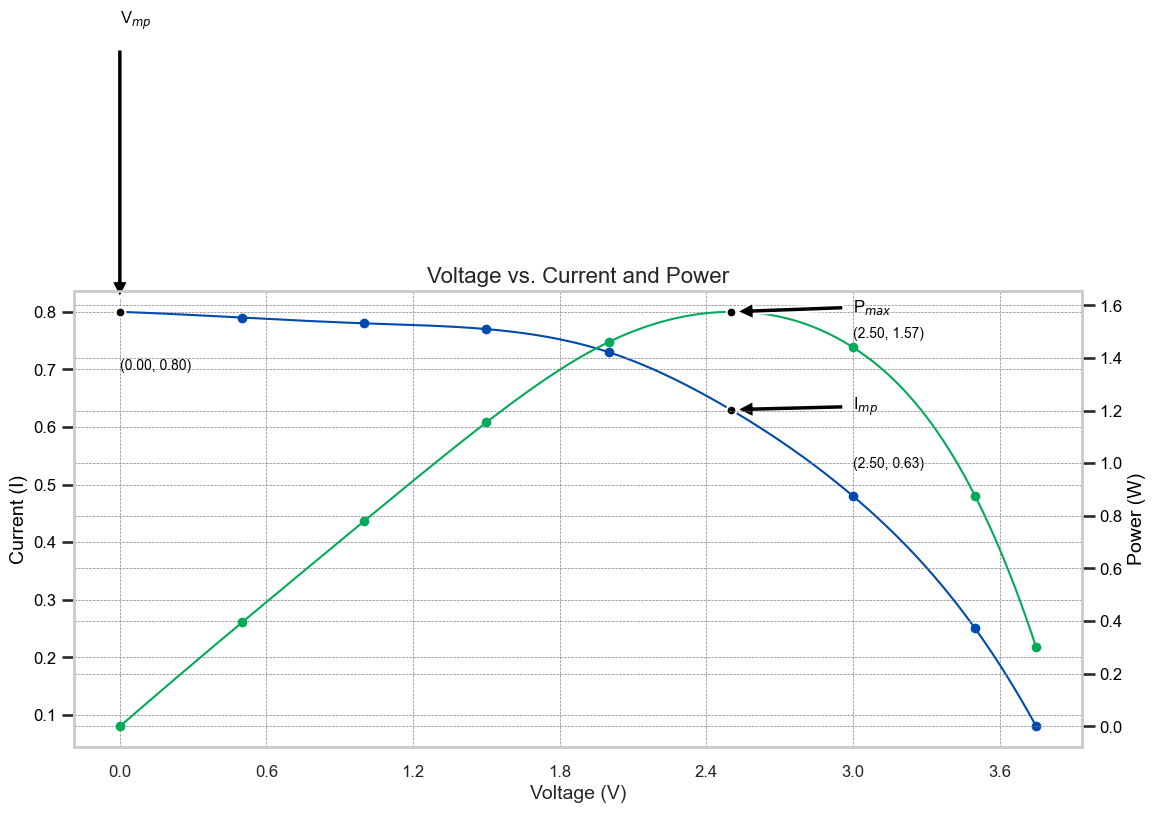

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Data for the graph
voltage = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 3.75])
current = np.array([0.8,  0.79, 0.78, 0.77, 0.73, 0.63, 0.48, 0.25, 0.08])
power = voltage * current

# Smooth data using spline interpolation
voltage_smooth = np.linspace(voltage.min(), voltage.max(), 500)
current_smooth = make_interp_spline(voltage, current)(voltage_smooth)
power_smooth = make_interp_spline(voltage, power)(voltage_smooth)

# Find the index of maximum power
max_power_idx = np.argmax(power)
max_power_voltage = voltage[max_power_idx]
max_power_current = current[max_power_idx]
max_power_value = power[max_power_idx]

# Find the index of maximum current
max_current_idx = np.argmax(current)
max_current_voltage = voltage[max_current_idx]
max_current_value = current[max_current_idx]

# Find the voltage corresponding to the maximum current (Vmp)
vmp_voltage = max_current_voltage
vmp_current = max_current_value

# Print values and coordinates
print(f"Pmax: {max_power_value} W at Voltage: {max_power_voltage} V, Current: {max_power_current} A")
print(f"Imp: {max_current_value} A at Voltage: {max_current_voltage} V")
print(f"Vmp: {vmp_voltage} V at Current: {vmp_current} A")

# Create a DataFrame
data = pd.DataFrame({'Voltage': voltage, 'Current': current, 'Power': power})

# Set the theme and context for larger scale
sns.set_theme(style="whitegrid")
sns.set_context("talk")  # Larger context for the plot

# Initialize the figure with a larger size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Voltage vs. Current with smooth curve
ax1.plot(voltage_smooth, current_smooth, color='#004aad', linewidth=1.5, label='Current')
ax1.scatter(voltage, current, color='#004aad', s=30)  # Adjusted marker size
ax1.set_xlabel('Voltage (V)', fontsize=14)
ax1.set_ylabel('Current (I)', fontsize=14, color='#000000')
ax1.tick_params(axis='y', labelcolor='#000000', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Set x-axis ticks
xticks = [i / 10.0 for i in range(0, 45, 6)]  # Generate ticks at 0.5 intervals
ax1.set_xticks(xticks)

# Create a secondary y-axis for power with smooth curve
ax2 = ax1.twinx()
ax2.plot(voltage_smooth, power_smooth, color='#03aa59', linewidth=1.5, label='Power')
ax2.scatter(voltage, power, color='#03aa59', s=30)  # Adjusted marker size
ax2.set_ylabel('Power (W)', fontsize=14, color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000', labelsize=12)

# Mark and annotate Pmax, Imp, Vmp
ax1.scatter(max_power_voltage, max_power_current, color='black', s=50, edgecolor='white', zorder=5)
ax1.annotate('I$_{mp}$', xy=(max_power_voltage, max_power_current), xytext=(max_power_voltage+0.5, max_power_current),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
ax1.text(max_power_voltage + 0.5, max_power_current - 0.1, f'({max_power_voltage:.2f}, {max_power_current:.2f})', fontsize=10, color='black')

ax2.scatter(max_power_voltage, max_power_value, color='black', s=50, edgecolor='white', zorder=5)
ax2.annotate('P$_{max}$', xy=(max_power_voltage, max_power_value), xytext=(max_power_voltage+0.5, max_power_value),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
ax2.text(max_power_voltage + 0.5, max_power_value - 0.1, f'({max_power_voltage:.2f}, {max_power_value:.2f})', fontsize=10, color='black')

ax1.scatter(vmp_voltage, vmp_current, color='black', s=50, edgecolor='white', zorder=5)
ax1.annotate('V$_{mp}$', xy=(vmp_voltage, vmp_current), xytext=(vmp_voltage, vmp_current+0.5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
ax1.text(vmp_voltage, vmp_current - 0.1, f'({vmp_voltage:.2f}, {vmp_current:.2f})', fontsize=10, color='black')

# Add title
plt.title('Voltage vs. Current and Power', fontsize=16)

# Customize grid lines to be lighter
ax1.grid(color='grey', linestyle='--', linewidth=0.5)  # Customize grid lines for ax1
ax2.grid(color='grey', linestyle='--', linewidth=0.5)  # Customize grid lines for ax2

# Manually adjust layout
plt.subplots_adjust(left=0.08, right=0.92, top=0.88, bottom=0.12)

# Show the plot
plt.show()


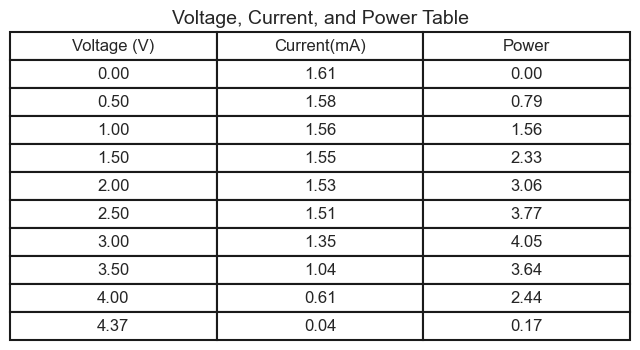

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
voltage = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.37]
current = [1.61, 1.58, 1.56, 1.55, 1.53, 1.51, 1.35, 1.04, 0.61, 0.04]
power = [v * c for v, c in zip(voltage, current)]

# Create a DataFrame with formatted values
data = pd.DataFrame({
    'Voltage (V)': [f'{v:.2f}' for v in voltage],
    'Current(mA)': [f'{c:.2f}' for c in current],
    'Power': [f'{p:.2f}' for p in power]
})

# Create a new figure for the table
fig_table, ax_table = plt.subplots(figsize=(8, 4))  # Adjust figure size to make it narrower

# Create the table
ax_table.axis('tight')
ax_table.axis('off')
table_data = data.values
columns = data.columns
table = ax_table.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.8, 1)  # Scale table width

# Add title to the table
plt.title('Voltage, Current, and Power Table', fontsize=14)

# Save or show the table figure
plt.savefig('table.png', bbox_inches='tight')
plt.show()


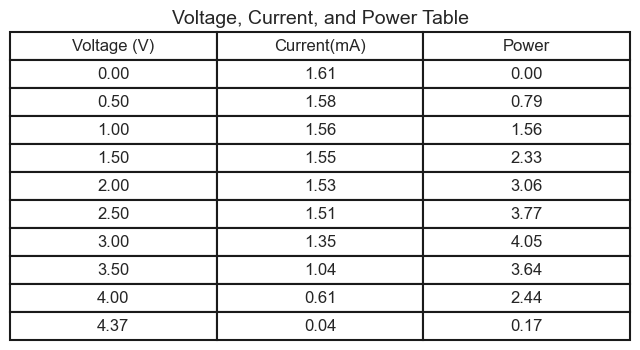

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
voltage = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.37]
current = [1.61, 1.58, 1.56, 1.55, 1.53, 1.51, 1.35, 1.04, 0.61, 0.04]
power = [v * c for v, c in zip(voltage, current)]

# Create a DataFrame with formatted values
data = pd.DataFrame({
    'Voltage (V)': [f'{v:.2f}' for v in voltage],
    'Current(mA)': [f'{c:.2f}' for c in current],
    'Power': [f'{p:.2f}' for p in power]
})

# Create a new figure for the table
fig_table, ax_table = plt.subplots(figsize=(8, 4))  # Adjust figure size to make it narrower

# Create the table
ax_table.axis('tight')
ax_table.axis('off')
table_data = data.values
columns = data.columns
table = ax_table.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.8, 1)  # Scale table width

# Add title to the table
plt.title('Voltage, Current, and Power Table', fontsize=14)

# Save or show the table figure
plt.savefig('table.png', bbox_inches='tight')
plt.show()


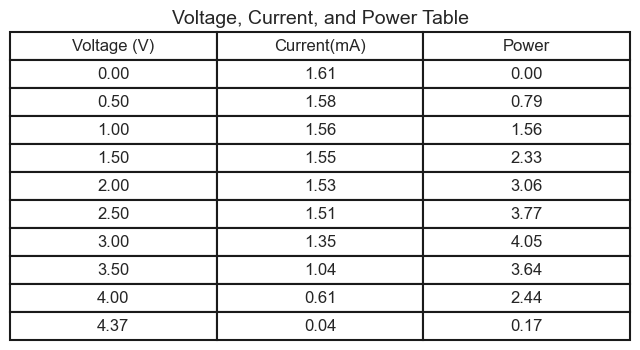

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
voltage = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.37]
current = [1.61, 1.58, 1.56, 1.55, 1.53, 1.51, 1.35, 1.04, 0.61, 0.04]
power = [v * c for v, c in zip(voltage, current)]

# Create a DataFrame with formatted values
data = pd.DataFrame({
    'Voltage (V)': [f'{v:.2f}' for v in voltage],
    'Current(mA)': [f'{c:.2f}' for c in current],
    'Power': [f'{p:.2f}' for p in power]
})

# Create a new figure for the table
fig_table, ax_table = plt.subplots(figsize=(8, 4))  # Adjust figure size to make it narrower

# Create the table
ax_table.axis('tight')
ax_table.axis('off')
table_data = data.values
columns = data.columns
table = ax_table.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.8, 1)  # Scale table width

# Add title to the table
plt.title('Voltage, Current, and Power Table', fontsize=14)

# Save or show the table figure
plt.savefig('table.png', bbox_inches='tight')
plt.show()
